# Assignment 2 — Dataset Exploration

## Goal
Before preprocessing, we need to carefully explore the dataset structure:
- Check **all columns**: names, datatypes, missing values.
- Verify that the **target column** (`Recommended IND`) exists and is binary.
- Understand what extra columns we can use (Title, Age, Department, Division, etc.).
- Decide which columns should be treated as **categorical**, **numerical**, or **text**.

---

## Steps
1. **Load CSV** into a Pandas DataFrame.
2. **Inspect shape and columns**: how many rows, how many features.
3. **Check datatypes** (`df.dtypes`).
4. **Look for categorical-like columns**:
   - If dtype is `object` or `string`, treat as categorical/text.
   - If dtype is `int`/`float` but has small unique values (like `1,2,3`), convert to category.
5. **Check target distribution**: how many `0` vs `1` in `Recommended IND`.
6. **Preview a few rows** for sanity check.

In [1]:
import pandas as pd

# Path to CSV (adjust if needed)
DATA_CSV = "../data/assignment3_II.csv"

# Load
df = pd.read_csv(DATA_CSV)

# Shape & first look
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())

# Info
print("\nInfo:")
print(df.info())

# Target distribution
if "Recommended IND" in df.columns:
    print("\nTarget distribution:")
    print(df["Recommended IND"].value_counts(normalize=True))

# Peek at first rows
df.head(5)

Shape: (19662, 12)

Columns:
 ['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating', 'Recommended IND', 'Positive Feedback Count', 'Division Name', 'Department Name', 'Class Name', 'Clothes Title', 'Clothes Description']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19662 entries, 0 to 19661
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              19662 non-null  int64 
 1   Age                      19662 non-null  int64 
 2   Title                    19662 non-null  object
 3   Review Text              19662 non-null  object
 4   Rating                   19662 non-null  int64 
 5   Recommended IND          19662 non-null  int64 
 6   Positive Feedback Count  19662 non-null  int64 
 7   Division Name            19662 non-null  object
 8   Department Name          19662 non-null  object
 9   Class Name               19662 non-null  object
 10  Clothes Title       

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Clothes Title,Clothes Description
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Elegant A-Line Dress,"A classic A-line dress that flows gracefully, ..."
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,Petite High-Waisted Trousers,"Chic, high-waisted trousers designed to elonga..."
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Silk Button-Up Blouse,A luxurious silk blouse with a timeless button...
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,Elegant A-Line Dress,"A classic A-line dress that flows gracefully, ..."
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,Petite Cable Knit Sweater,A cozy cable knit sweater tailored specificall...


In [4]:
for col in df.columns:
    unique_vals = df[col].dropna().unique()
    n_unique = len(unique_vals)

    # Decide column type
    if df[col].dtype in ["int64", "float64"]:
        if n_unique <= 10:
            col_type = "Categorical (numeric)"
        else:
            col_type = "Numerical"
    elif df[col].dtype == "object":
        if n_unique < 50:
            col_type = "Categorical"
        else:
            col_type = "Textual / High-cardinality"
    else:
        col_type = "Other"

    cats = list(unique_vals[:20]) if n_unique <= 30 else None  # only show if small
    summary.append({
        "Column": col,
        "Type": col_type,
        "Unique Count": n_unique,
        "Categories": cats
    })

summary_df = pd.DataFrame(summary)
display(summary_df)

,Column,Type,Unique Count,Categories
0,Clothing ID,Numerical,1095,None
1,Age,Numerical,77,None
2,Title,Textual / High-cardinality,13983,None
3,Review Text,Textual / High-cardinality,19656,None
4,Rating,Categorical (numeric),5,"[3, 5, 2, 4, 1]"
5,Recommended IND,Categorical (numeric),2,"[0, 1]"
6,Positive Feedback Count,Numerical,79,None
7,Division Name,Categorical,3,"[General, General Petite, Initmates]"
8,Department Name,Categorical,6,"[Dresses, Bottoms, Tops, Intimate, Jackets, Tr..."
9,Class Name,Categorical,20,"[Dresses, Pants, Blouses, Knits, Intimates, Ou..."


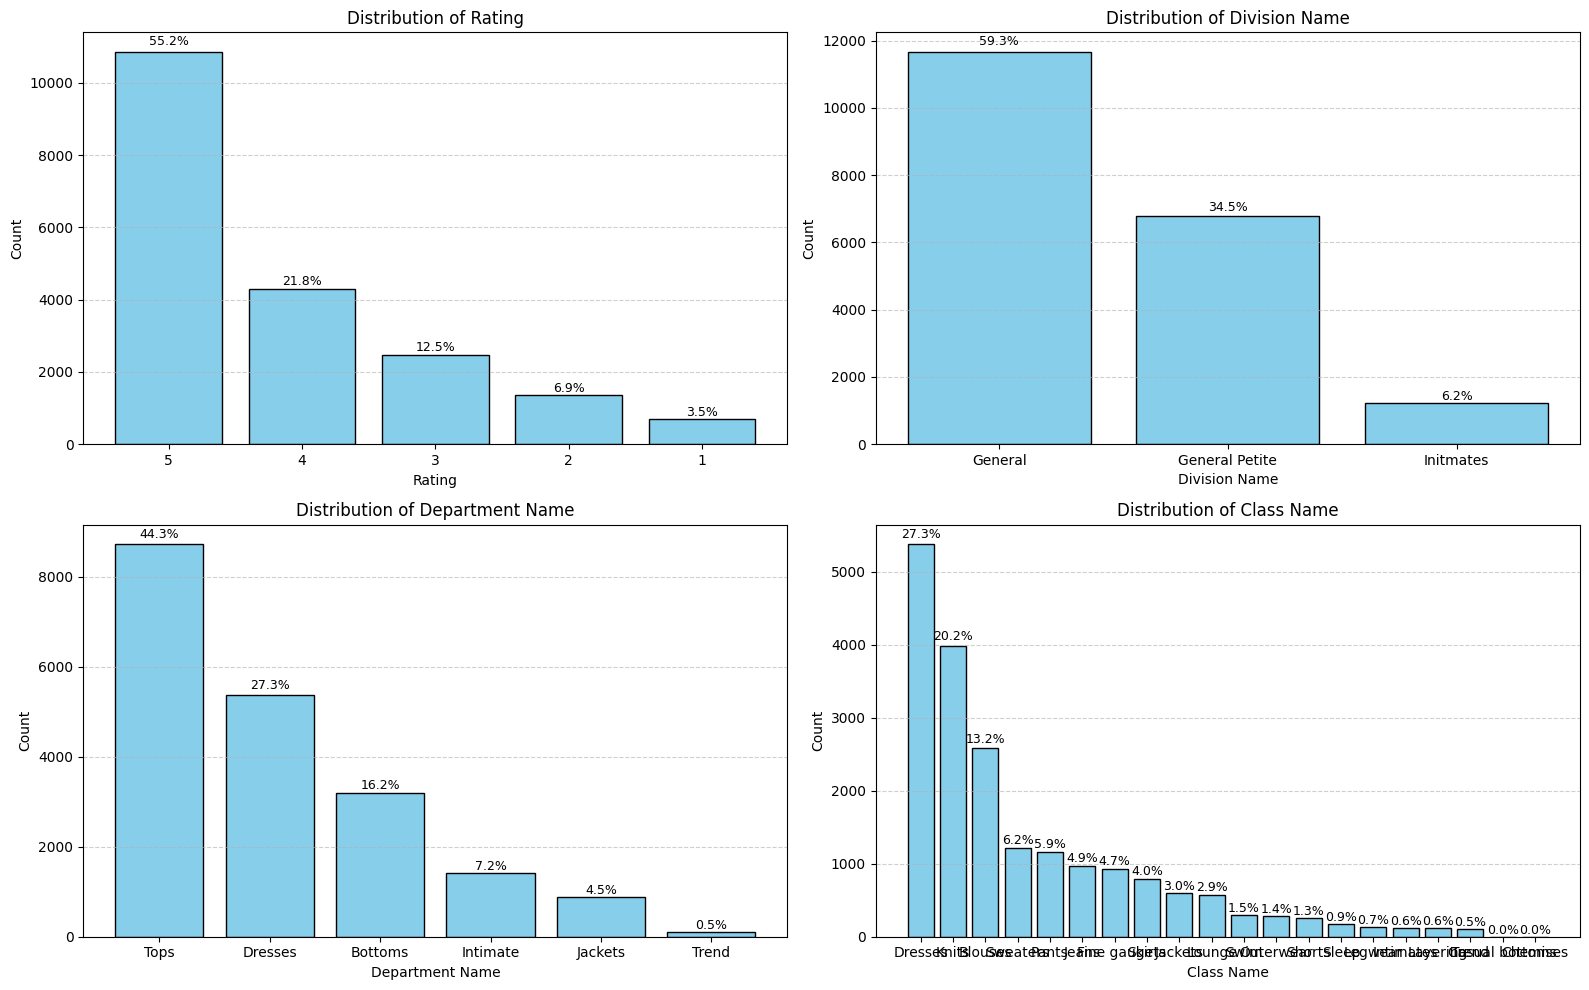

In [9]:
import matplotlib.pyplot as plt

# Categorical columns to plot
cat_cols = ["Rating", "Division Name", "Department Name", "Class Name"]

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    counts = df[col].value_counts()
    percentages = counts / counts.sum() * 100
    
    bars = axes[i].bar(
        counts.index.astype(str),
        counts.values,
        color="skyblue",
        edgecolor="black"
    )
    
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_ylabel("Count")
    axes[i].set_xlabel(col)
    axes[i].grid(axis="y", linestyle="--", alpha=0.6)
    
    # Add percentage labels above each bar
    for bar, pct in zip(bars, percentages):
        height = bar.get_height()
        axes[i].text(
            bar.get_x() + bar.get_width() / 2,
            height + (height * 0.01),   # slight offset above bar
            f"{pct:.1f}%",
            ha="center",
            va="bottom",
            fontsize=9,
            color="black"
        )

plt.tight_layout()
plt.show()

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Define categorical columns of interest
cat_cols = ["Rating", "Division Name", "Department Name", "Class Name"]

# Build summary table
summary_list = []
for col in cat_cols:
    counts = df[col].value_counts()
    percentages = counts / counts.sum() * 100
    for category, count in counts.items():
        summary_list.append({
            "Column": col,
            "Category": category,
            "Count": count,
            "Percentage": f"{percentages[category]:.1f}%"
        })

summary_table = pd.DataFrame(summary_list)

# Display summary table
print("=== Summary Table of Categories ===")
display(summary_table)

=== Summary Table of Categories ===


,Column,Category,Count,Percentage
0,Rating,5,10858,55.2%
1,Rating,4,4289,21.8%
2,Rating,3,2464,12.5%
3,Rating,2,1360,6.9%
4,Rating,1,691,3.5%
5,Division Name,General,11664,59.3%
6,Division Name,General Petite,6778,34.5%
7,Division Name,Initmates,1220,6.2%
8,Department Name,Tops,8713,44.3%
9,Department Name,Dresses,5371,27.3%
